<a href="https://colab.research.google.com/github/Jabed-Hasan/python/blob/main/Lab_11__Convolution_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Notes

* Instead of connecting every input neuron to every hidden neuron (like in MLP), CNN uses convolutional filters (kernels) that scan over the input to capture local patterns (e.g., edges, corners, textures).

# Working Procedure
Consider an image (matrix of pixel values), a filter / kernel (say 3×3 matrix) slides over the image. At each position:

1. Multiply kernel values with overlapping image pixel values
2. Sum them up → one output value
3. Slide the filter (stride) → repeat

This process extracts features:
* Some kernels detect edges (vertical, horizontal)
* Deeper layers detect shapes, objects

## Step 1: Importing libraries

In [ ]:
import numpy as np

## Step 2: Image data as matrix

In [ ]:
# 5x5 image
image = np.array([
    [1, 2, 3, 0, 1],
    [0, 1, 2, 3, 1],
    [3, 1, 0, 2, 4],
    [2, 0, 1, 3, 2],
    [1, 3, 2, 2, 0]
])

# 3x3 filter (edge detection kernel)
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

## Step-3: Building Convolution Layer

In [ ]:
def convolve2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    img_height, img_width = image.shape

    # Output size = Image size − Kernel size + 1                                (valid Convolution, another is Same Convolution - with padding)
    output_height = img_height - kernel_height + 1
    output_width = img_width - kernel_width + 1
    output = np.zeros((output_height, output_width))

    # Convolution operation
    for i in range(output_height):
        for j in range(output_width):
            region = image[i:i+kernel_height, j:j+kernel_width]
            output[i, j] = np.sum(region * kernel)

    return output

## Step-4: Implementation and result

In [ ]:
# Apply convolution
result = convolve2d(image, kernel)

print("Original Image:\n", image)
print("\nKernel:\n", kernel)
print("\nConvolved Output:\n", result)

Original Image:
 [[1 2 3 0 1]
 [0 1 2 3 1]
 [3 1 0 2 4]
 [2 0 1 3 2]
 [1 3 2 2 0]]

Kernel:
 [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]

Convolved Output:
 [[-1. -1. -1.]
 [ 2. -6. -4.]
 [ 3. -3. -3.]]


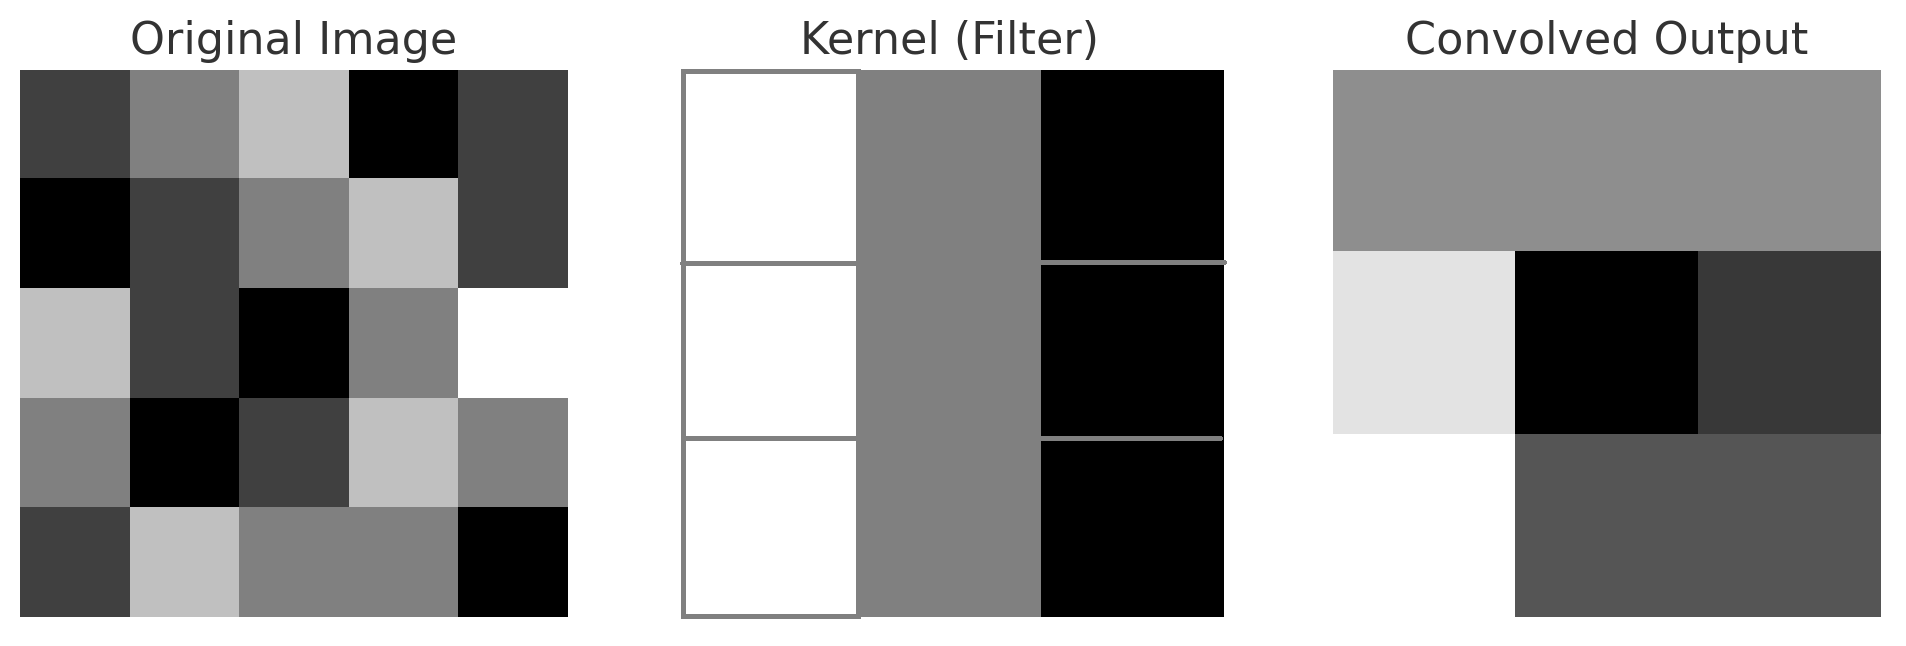

# Using Tensorflow framework

In [ ]:
# Importing libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

TensorFlow/Keras and PyTorch use a **4D tensor format** to process batches of images efficiently.

$$ Input Shape=[Batch Size,Height,Width,Channels]$$

**Batch Size:** Number of images processed together

**Height & Width:** The spatial dimensions of image

**Channels:** Number of color channels:
  * 1 → Grayscale
  * 3 → RGB
  * 4 → RGBA

Similarly,
$$ Kernel Shape=[Height,Width,In\_Channels,Out\_Channels] $$

**In Channels:** If the image is grayscale → in_channels = 1, and If the image is RGB → in_channels = 3

**Out Channels:** Number of filters we want to apply. Each filter learns to detect a **different feature** (e.g., vertical edge, horizontal edge, texture).

In [ ]:
# Previous 5x5 2D image (same as before), but Conv2D expects 4D tensor [batch, height, width, channels]

image = np.array([
    [1, 2, 3, 0, 1],
    [0, 1, 2, 3, 1],
    [3, 1, 0, 2, 4],
    [2, 0, 1, 3, 2],
    [1, 3, 2, 2, 0]
], dtype=np.float32)

image = image.reshape(1, 5, 5, 1)                                               # tensor shape = (batch=1, height=5, width=5, channels=1)

# Kernel (3x3 filter), TensorFlow expects [height, width, in_channels, out_channels]
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
], dtype=np.float32).reshape(3, 3, 1, 1)

A Conv2D layer’s weights are stored as:
$$ [kernel, bias] $$


* kernel → the filters (shape [h, w, in_channels, out_channels])
* bias → one bias per output channel (shape [out_channels])

Here, bias not used (use_bias=False), so we only pass [kernel] → Kernel shape = (3, 3, 1, 1)



In [ ]:
# Build Conv2D layer
conv_layer = tf.keras.layers.Conv2D(
    filters=1,                                                                  # number of filters
    kernel_size=(3,3),
    use_bias=False                                                              # no bias, to match previous manual calculation
)

# Build weights into the layer                                                  # Normally, when a Conv2D layer is called with input data, it builds automatically
conv_layer.build((1, 5, 5, 1))
conv_layer.set_weights([kernel])                                                # Replaces the default random filter weights with our custom kernel

# Apply convolution
result = conv_layer(image)

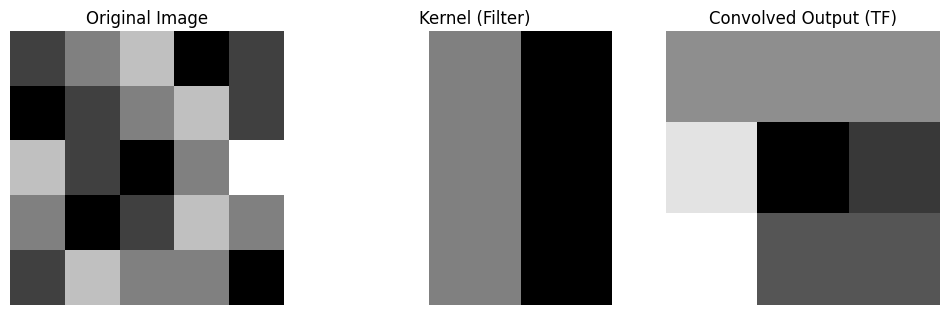

In [ ]:
# Convert to numpy
result_np = result.numpy().squeeze()                                            # output 4D tensor (1, 3, 3, 1) → squeeze → (3, 3)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(image.squeeze(), cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(kernel.squeeze(), cmap='gray')
axes[1].set_title("Kernel (Filter)")
axes[1].axis("off")

axes[2].imshow(result_np, cmap='gray')
axes[2].set_title("Convolved Output (TF)")
axes[2].axis("off")

plt.show()